# Questão 4
## De um velocímetro de um automóvel foram obtidos as seguintes leituras de velocidade instantânea:
| t(minutos) | 0 | 5 | 10 | 15 | 20 |
| --- | --- | --- | --- | --- | --- |
| v(km/h) | 0 | 27 | 27 | 54 | 54 |

### <div align="center">Tabela 1: Tabela de instantes de tempo de velocidades instantâneas.</div>
## Considerando a Tabela 1, calcule a aproximação pelo Métodos dos Mínimos Quadrados pela função $g(x) = αx + β$. Em seguida, ache o polinômio interpolador $p(x)$ usando sistema linear para o mesmo conjunto de pontos (Tabela 1). Por fim, compare o resultado de $g(x = 7)$ e $p(x = 7)$, veja qual deles mais se aproxima dos dados e justifique a resposta.

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np
from scipy.linalg import lstsq
import statistics

In [11]:
t_minutos =  np.array([0, 5, 10, 15, 20]) #x
v_kmh =  np.array([0, 27, 27, 54, 54]) #fx

print(t_minutos)
print(v_kmh)

[ 0  5 10 15 20]
[ 0 27 27 54 54]


#### Função MMQ para  $g(x) = αx + β$

In [12]:
def mmq(x, y):
    g1_x = x
    g2_x = np.ones(len(x), dtype=int)
    
    g1_x_g1_x = g1_x**2
    g1_x_g2_x = g1_x * g2_x
    g2_x_g1_x = g2_x * g1_x
    g2_x_g2_x = g2_x**2
    
    f_x_g1_x = y * g1_x
    f_x_g2_x = y * g2_x
    
    soma_g1_x_g1_x = np.sum(g1_x_g1_x)
    soma_g1_x_g2_x = np.sum(g1_x_g2_x)
    soma_g2_x_g1_x = np.sum(g2_x_g1_x)
    soma_g2_x_g2_x = np.sum(g2_x_g2_x)
    soma_f_x_g1_x = np.sum(f_x_g1_x)
    soma_f_x_g2_x = np.sum(f_x_g2_x)
    
    Matriz_A = np.matrix([
                            [soma_g1_x_g1_x, soma_g1_x_g2_x],
                            [soma_g2_x_g1_x, soma_g2_x_g2_x]
                         ])
    Vetor_B = np.array([soma_f_x_g1_x, soma_f_x_g2_x])
    
    aux_A00 = Matriz_A[0,0] / Matriz_A[0,0]
    aux_A01 = Matriz_A[0,1] / Matriz_A[0,0]
    aux_B = Vetor_B[0] / Matriz_A[0,0]
    
    aux1 = Matriz_A[1,0] - Matriz_A[1,0] * aux_A00
    aux2 = Matriz_A[1,1] - Matriz_A[1,0] * aux_A01
    aux3 = Vetor_B[1] - Matriz_A[1,0] * aux_B
    
    b = aux3 / aux2
    a = aux_B - (b * aux_A01)
    
    return(a, b)

#### Resolvendo o MMQ

In [16]:
a,b = mmq(t_minutos, v_kmh)

#### EXTRA: Plotando o grafico pós MMQ

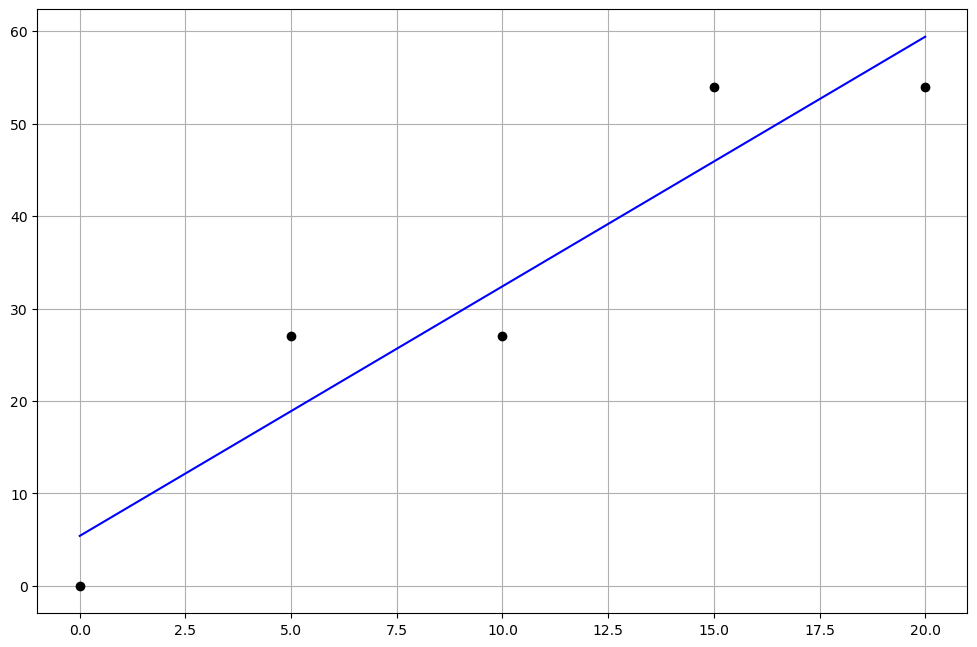

In [18]:
fig = plt.figure(figsize=(12,8), dpi= 100)
ax = plt.axes()
x = t_minutos
y = a*x + b

plt.plot(t_minutos, v_kmh, 'o', color='black');
plt.plot(x, y, color='blue');

plt.grid()
plt.show()

#### Função para achar o polinômio interpolador para $g(x) = αx + β$

In [102]:
def polinomioInterpolador(x, y):
    Matrix_A = np.ones((len(t_minutos), len(t_minutos)), dtype=int)

    cont_x = 0
    while(cont_x != len(x)):
        cont = 0
        parte_matrix = np.array([], dtype=int)
        while(cont != len(x)):
            Matrix_A[cont_x,cont] = np.append(parte_matrix, t_minutos[cont_x]**cont)
            cont += 1
        cont_x += 1

    Vetor_B = v_kmh

    return np.linalg.solve(Matrix_A, Vetor_B)

In [103]:
vetor_gerado = polinomioInterpolador(t_minutos, v_kmh)
print(vetor_gerado)

[ 0.00e+00  1.71e+01 -3.60e+00  2.88e-01 -7.20e-03]


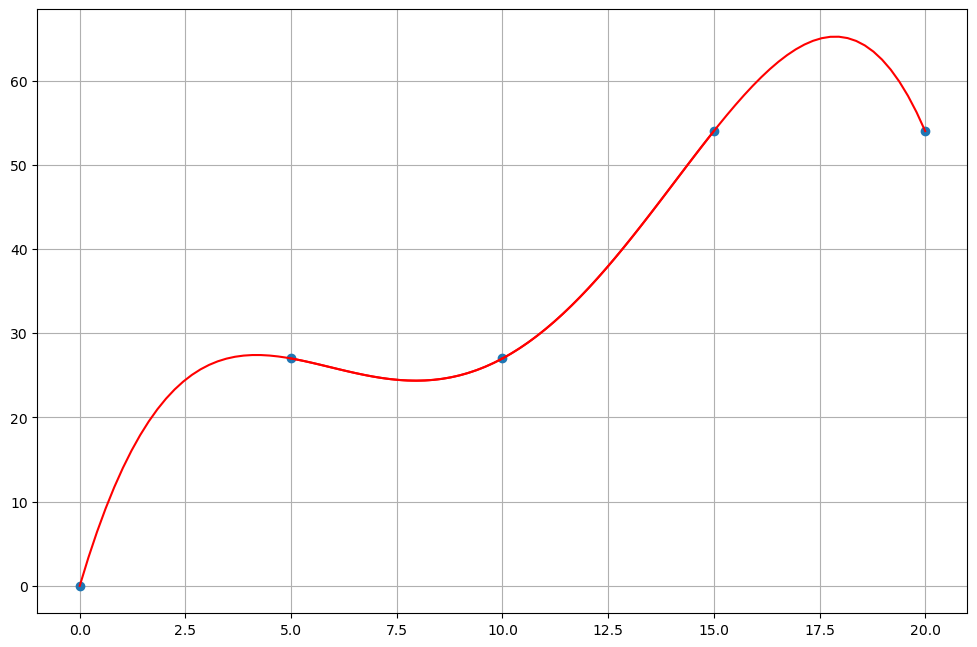

In [109]:
fig = plt.figure(figsize=(12,8), dpi= 100)
ax = plt.axes()
x = np.linspace(t_minutos, 10)
y = vetor_gerado[0] + vetor_gerado[1] * x + vetor_gerado[2] * x**2 + vetor_gerado[3] * x**3 + vetor_gerado[4] * x**4
plt.plot(t_minutos, v_kmh, 'o');
plt.plot(x, y, color='red'); 
plt.grid()
plt.show()